In [36]:
import gym
from gym import wrappers
import os
import numpy as np
import time
import pandas as pd

import matplotlib.pyplot as plt

In [22]:
def qlearn(env = gym.make('Taxi-v3'), alpha = 0.85):

    env._max_episode_steps = 500

    # Q and rewards
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = []
    iterations = []
    times = []

    # Parameters
    alpha = alpha
    discount = 0.99
    episodes = 1000

    # Episodes
    for episode in range(episodes):
        start = time.time()
        # Refresh state
        state = env.reset()
        done = False
        t_reward = 0
        max_steps = env._max_episode_steps

        # Run episode
        for i in range(max_steps):
            if done:
                break

            current = state
            action = np.argmax(Q[current, :] + np.random.randn(1, env.action_space.n) * (1 / float(episode + 1)))

            state, reward, done, info = env.step(action)
            t_reward += reward
            Q[current, action] += alpha * (reward + discount * np.max(Q[state, :]) - Q[current, action])

        rewards.append(t_reward)
        iterations.append(i)
        end = time.time()
        times.append(end - start)

    # Close environment
    env.close()
    return rewards, iterations, times

In [57]:
R = []
I = []
T = []
for alpha in np.arange(0.1, 1, 0.2):
    rewards, iterations, times = qlearn(env = gym.make('Taxi-v3'), alpha = alpha)
    R.append(rewards)
    I.append(iterations)
    T.append(times)

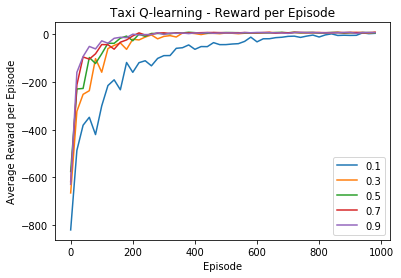

In [62]:
# Plot results
def chunk_list(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

idx = 0
for alpha in np.arange(0.1, 1, 0.2):
    size = 20
    chunks = list(chunk_list(R[idx], size))
    averages = [sum(chunk) / len(chunk) for chunk in chunks]

    plt.plot(range(0, len(R[idx]), size), averages, label=round(alpha,1))
    idx += 1
plt.legend(loc="best")

plt.xlabel('Episode')
plt.ylabel('Average Reward per Episode')
plt.title('Taxi Q-learning - Reward per Episode')

plt.show()

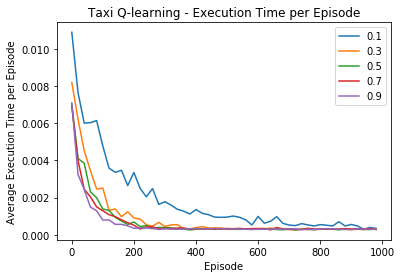

In [61]:
# Plot results
def chunk_list(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

idx = 0
for alpha in np.arange(0.1, 1, 0.2):
    size = 20
    chunks = list(chunk_list(T[idx], size))
    averages = [sum(chunk) / len(chunk) for chunk in chunks]

    plt.plot(range(0, len(T[idx]), size), averages, label=round(alpha,1))
    idx += 1
plt.legend(loc="best")

plt.xlabel('Episode')
plt.ylabel('Average Execution Time per Episode')
plt.title('Taxi Q-learning - Execution Time per Episode')

plt.show()

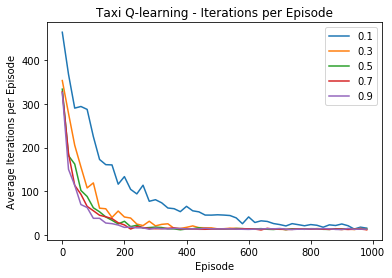

In [60]:
# Plot results
def chunk_list(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

idx = 0
for alpha in np.arange(0.1, 1, 0.2):
    size = 20
    chunks = list(chunk_list(I[idx], size))
    averages = [sum(chunk) / len(chunk) for chunk in chunks]

    plt.plot(range(0, len(I[idx]), size), averages, label=round(alpha,1))
    idx += 1
plt.legend(loc="best")

plt.xlabel('Episode')
plt.ylabel('Average Iterations per Episode')
plt.title('Taxi Q-learning - Iterations per Episode')

plt.show()

In [70]:
R = []
I = []
T = []
for alpha in np.arange(0.1, 1, 0.2):
    rewards, iterations, times = qlearn(env = gym.make('FrozenLake8x8-v0', is_slippery = False), alpha = alpha)
    R.append(rewards)
    I.append(iterations)
    T.append(times)

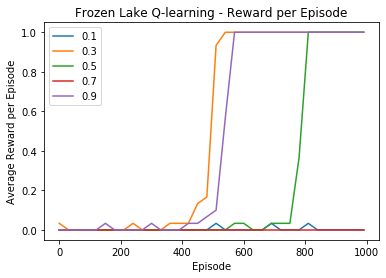

In [75]:
# Plot results
def chunk_list(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

idx = 0
for alpha in np.arange(0.1, 1, 0.2):
    size = 30
    chunks = list(chunk_list(R[idx], size))
    averages = [sum(chunk) / len(chunk) for chunk in chunks]

    plt.plot(range(0, len(R[idx]), size), averages, label=round(alpha,1))
    idx += 1
plt.legend(loc="best")

plt.xlabel('Episode')
plt.ylabel('Average Reward per Episode')
plt.title('Frozen Lake Q-learning - Reward per Episode')

plt.show()

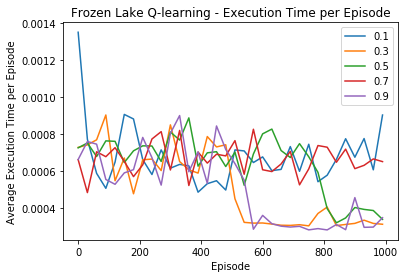

In [76]:
# Plot results
def chunk_list(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

idx = 0
for alpha in np.arange(0.1, 1, 0.2):
    size = 30
    chunks = list(chunk_list(T[idx], size))
    averages = [sum(chunk) / len(chunk) for chunk in chunks]

    plt.plot(range(0, len(T[idx]), size), averages, label=round(alpha,1))
    idx += 1
plt.legend(loc="best")

plt.xlabel('Episode')
plt.ylabel('Average Execution Time per Episode')
plt.title('Frozen Lake Q-learning - Execution Time per Episode')

plt.show()

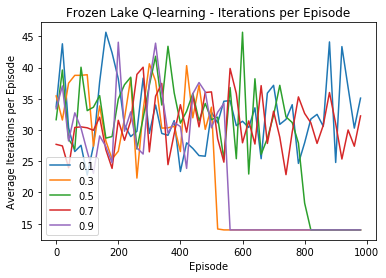

In [77]:
# Plot results
def chunk_list(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

idx = 0
for alpha in np.arange(0.1, 1, 0.2):
    size = 20
    chunks = list(chunk_list(I[idx], size))
    averages = [sum(chunk) / len(chunk) for chunk in chunks]

    plt.plot(range(0, len(I[idx]), size), averages, label=round(alpha,1))
    idx += 1
plt.legend(loc="best")

plt.xlabel('Episode')
plt.ylabel('Average Iterations per Episode')
plt.title('Frozen Lake Q-learning - Iterations per Episode')

plt.show()